# 선형 회귀분석의 기초regression analysis
## 1. 회귀분석 중 결정론적 모형
- **D차원 vector** 독립변수 x에 대응하는 **scalar** 종속변수 y와 가장 비슷한 값 $\hat{y}$ 찾기
    - $\hat{y} = f(x) \approx y$
    
    
- 선형 회귀분석linear regression analysis
    - x, y,가 선형관계가 선형함수f(x)
    - $\hat{y} = w_0 + w_1x_1 + \ldots + w_Dx_D$
    - $w_0, \ldots, w_D$: f(x)의 **계수coefficient & 모수parameter**
###    $$\rightarrow \hat{y}=w_0+w^Tx$$
    
    

### 1) 상수항 결합(bias augumentation)
- $w_a$: 상수항 $w_0$(bias) 가중치 벡터
- $x_a$: 1-vector 추가한 입력 데이터 Matrix

$$
X_a = 
\begin{bmatrix}
1 & x_{11} & \ldots & x_{1D} \\
\vdots & \vdots & \vdots & \vdots\\
1 & x_{N1} & \ldots & x_{ND} \\
\end{bmatrix}
$$


$$
f(x) = \begin{bmatrix} 1 & x_1 \ldots & x_D \end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ \vdots \\ w_D
\end{bmatrix}
=
x_a^Tw_a
=
w_a^Tx_a
$$

### bias augmentation #1

In [3]:
from sklearn.datasets import make_regression
X0, y, coef = make_regression(n_samples=100, n_features=2, bias=100, noise=10, coef=True, random_state=1)

In [4]:
X0[:3]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ]])

In [6]:
np.ones((X0.shape[0],1))[:3]

array([[1.],
       [1.],
       [1.]])

In [29]:
X = np.hstack((np.ones((X0.shape[0],1)), X0))
X[:3]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ]])

### bias augmentation #2

In [11]:
import statsmodels.api as sm
x = sm.add_constant(X0)
x[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

## 2. OLS(Ordinary Least Squares)
- 가장 기본적인 결정론적 선형 회귀 방법
- 잔차제곱합(RSS: Residual Sum of Squares) 최소화
### 2.1.1 예측모형 
$$\hat{y} = Xw$$
### 2.1.2. e(residual vector) 
$$e = y - \hat{y} = y - Xw$$
### 2.1.3. RSS 
### $$ \begin{eqnarray}
e^Te = (y-Xw)^T(y-Xw)
\end{eqnarray}$$
### 2.1.4. RSS 최소되는 최적화 조건
### $$ \dfrac{d \text{RSS}}{dw} = -2X^Ty + 2X^TXw=0\\
X^TXw^* = X^Ty $$
### 2.1.5. 가중치 벡터 $w^*$
### $$(X^TX)^{-1}X^Ty$$
##### cf. 주의사항: $X^TX$는 PD($X$: Full rank=선형독립) $\rightarrow$ invertible matrix




### 2.2 직교방정식 normal equation
### $$X^Ty - X^TXw = 0$$
### 2.2.1 인수분해
$$X^T(y-Xw) \rightarrow X^Te=0$$ 
### 2.2.2 성질
#### 1) 잔차 vector 원소 합 = 0
### $$
\sum_{i=0}^N e_i = 0
$$
#### 2) 각 feature 평균값 지닌 평균꽃 $\bar{x}$ 에 대한 예측값은 $\bar{y}$
### $$
\bar{y} = w^T \bar{x}
$$

### numpy연습 
    - dataset 생성 -> 수식으로 직접 coef -> 비교

In [11]:
from sklearn.datasets import make_regression

bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1, 
                              bias=bias, noise=10, coef=True)
x = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [19]:
coef

array(40.98411182)

### $$y = 100(bias) + 40.9841x + \epsilon$$

In [24]:
#OLS 직접 얻기
np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

array([[101.01418039],
       [ 41.16993604]])

### $$y = 101.0141(bias) + 41.1699x + \epsilon$$

In [40]:
#lstsq
bias = np.linalg.lstsq(x, y, rcond=None)[0][0]
w = np.linalg.lstsq(x, y, rcond=None)[0][1]
x1 = x[:,1:]

array([41.16993604])

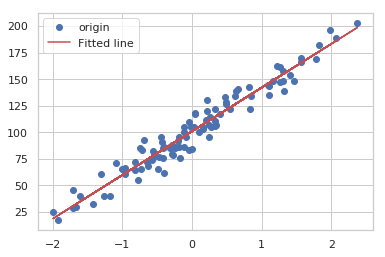

In [41]:
#그래프 비교
%matplotlib inline
plt.plot(x1, y, 'o', label="origin")
plt.plot(x1, w*x1+bias, 'r', label="Fitted line")
plt.legend()
plt.show()

### scikit-learn 연습

In [29]:
X, y = make_regression()
# fit_intercept: bias
# fit: 모형추정
# .fit ob의 멤버변수: coef_, intercept_(bias) & .predict(x)
# predict메소드: 식 활용
model = LinearRegression(fit_intercept=True)
model = model.fit(X, y)
y.new = model.predict(x_new)

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

In [18]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
#intercept: bias
boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

In [43]:
np.shape(model_boston.coef_), model_boston.intercept_

((13,), 36.45948838509045, (506, 13))

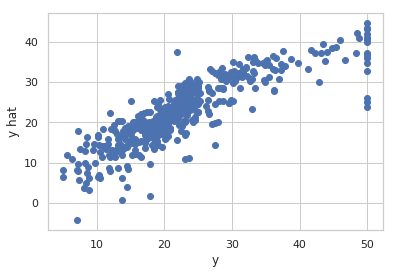

In [48]:
%matplotlib inline
predictions = model_boston.predict(boston.data)

# plt.scatter(boston.target, predictions)
plt.scatter(boston.target, predictions)
plt.xlabel('y')
plt.ylabel('y hat')
plt.show()

연습1. 가상데이터 만들고 `LinearRegression`클래스로 회귀분석

68.95316034079329


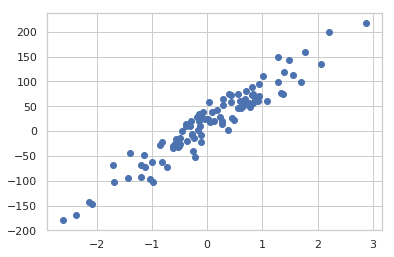

In [63]:
x, y, coef = make_regression(n_features=1, noise=20, bias=13, coef=True, random_state=99)
print(coef)
plt.scatter(x, y)
plt.show()

In [76]:
model = LinearRegression(fit_intercept=True).fit(x, y)
print('coef(실제:68.95): ', model.coef_[0], '\n', 'bias(실제:13): ', model.intercept_)

coef(실제:68.95):  70.61730514806914 
 bias(실제:13):  14.35684965848111


### statsmodels 연습

In [ ]:
#OLS 클래스 사용
#add_constant필요
#.fit() -> RegressionResults 클래스 객체 생성
#RegressionResults 객체는 summary와 predict제공
model = OLS(x, y)
result = model.fit()
result.summary()
y_new = result.predict(x_new)

In [83]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfx = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
result_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 03 Nov 2018   Prob (F-statistic):          6.72e-135
Time:                        07:52:19   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""